In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
jobs = pd.read_csv('job-market(2).csv')
jobs.head(3)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN


Text(0, 0.5, 'Classification')

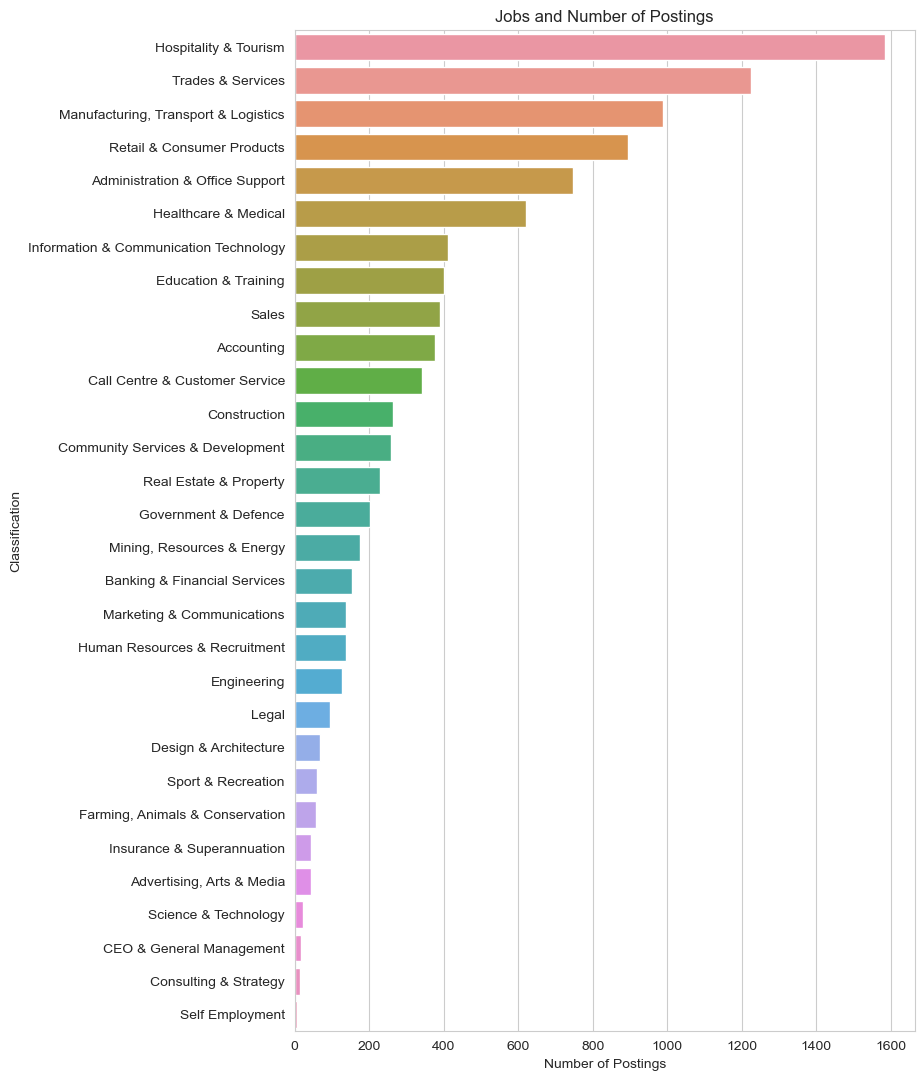

In [65]:
%matplotlib inline
plt.figure(figsize=(8, 13))
plt.title('Jobs and Number of Postings')
countplot = sns.countplot(data=jobs, y="Classification", order = jobs['Classification'].value_counts().index)
plt.xlabel('Number of Postings')
plt.ylabel('Classification')


In [66]:
import matplotlib
#create dataframe for salary ranges
salaryDf = jobs[jobs['LowestSalary'].isna()==False]
salaryDf = salaryDf.groupby('LowestSalary').count()
salaryDf['LowestSalary'] = salaryDf.index
salaryDf['Count'] = salaryDf["Id"]
salaryDf.head()

# jobs_salary_ranges = jobs.dropna(subset=['LowestSalary', 'HighestSalary'])
# jobs_salary_ranges['Salary Range'] = jobs_salary_ranges['LowestSalary'].astype(str) + 'k - ' + jobs_salary_ranges['HighestSalary'].astype(str) + 'k'
# counts = jobs_salary_ranges['Salary Range'].value_counts()
# labels = counts.keys()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,HighestSalary,JobType,LowestSalary,Count
LowestSalary,,,,,,,,,,,,,,
0.0,3894,3894,3571,3894,3894,2560,3894,3894,3894,3737,3894,3740,0.0,3894
30.0,1842,1842,1779,1842,1842,1082,1842,1842,1842,1815,1842,1816,30.0,1842
40.0,2519,2519,2373,2519,2519,1516,2519,2519,2519,2474,2519,2475,40.0,2519
50.0,1844,1844,1760,1844,1844,1234,1844,1844,1844,1817,1844,1821,50.0,1844


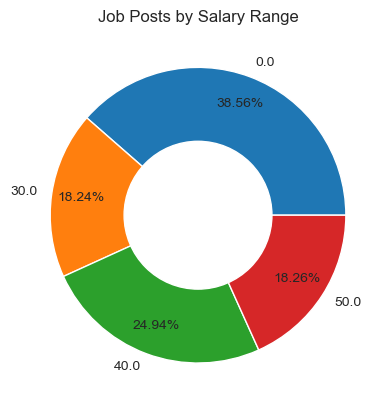

In [67]:
#salary ranges plot
plt.pie(salaryDf['Count'], labels=salaryDf['LowestSalary'], autopct='%1.2f%%', pctdistance=0.8)
circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Job Posts by Salary Range')
plt.show()

In [68]:
locationDf = jobs[jobs['Location'].isna()==False]
specified_cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']
locationDf['Location'] = locationDf['Location'].apply(lambda x: x if x in capital_cities else 'Others')
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

C:\Users\calla\AppData\Local\Temp\ipykernel_15332\3398464854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locationDf['Location'] = locationDf['Location'].apply(lambda x: x if x in capital_cities else 'Others')


,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,Adelaide,390
Brisbane,1119,1119,1056,1119,987,1119,1119,1119,1086,1119,1119,1086,Brisbane,1119
Melbourne,2481,2481,2338,2481,2290,2481,2481,2481,2406,2481,2481,2407,Melbourne,2481
Others,2648,2648,2432,2648,0,2648,2648,2648,2592,2648,2648,2595,Others,2648
Perth,677,677,654,677,563,677,677,677,652,677,677,655,Perth,677


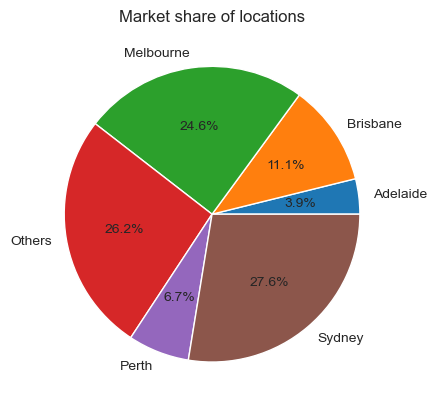

In [69]:
%matplotlib inline
# Pie char for job market share of cities
from matplotlib import cm

sns.set_style("whitegrid")
sns.color_palette("pastel")
plt.pie(locationDf['Count'], labels=locationDf['Location'], autopct='%1.1f%%')
plt.title('Market share of locations')
plt.show()